# FLIPPED PSF

We will convolute the image of the caustics obtained by two leds with the PSF'. The PSF' is the image of the PSF where you flip the left and the right, and the top and the bottom.   

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from scipy import signal
from PIL import Image

We upload the two leds image and convert it to an array

In [10]:
i0 = Image.open('images/i0_0001.jpg')
realsize=i0.size
print(realsize)
factor=4
newsize=tuple(int(ti/factor) for ti in realsize)
print(newsize)
i0=i0.resize(newsize,Image.ANTIALIAS)
i0 = np.array(i0)
i0 = i0[:, :, 0] #For instance, at point (100,50) we had [0.608, 0.608, 0.608]. Now only have a single 0.608 value.
print(i0.shape) #[Y,X]
print('i0(t) imported and reduced correctly!')

(3280, 2464)
(820, 616)
(616, 820)
i0(t) imported and reduced correctly!


We upload the filter (PSF) and convert it to an array. Finally, we flip it.

In [11]:
h = Image.open('images/h_0001.jpg')
realsize=h.size
print(realsize)
factor=4
newsize=tuple(int(ti/factor) for ti in realsize)
print(newsize)
h=h.resize(newsize,Image.ANTIALIAS)
h = np.array(h)
h = h[:, :, 0] #For instance, at point (100,50) we had [0.608, 0.608, 0.608]. Now only have a single 0.608 value.
size_x = len(h[0])
size_y = len(h)
print(h.shape) #[Y,X]
print(size_x)
print(size_y)
print('h(t) imported and reduced correctly!')

# FLIP:
hf = np.flip(h, axis=None)
print("Flipped!")

(3280, 2464)
(820, 616)
(616, 820)
820
616
h(t) imported and reduced correctly!
Flipped!


Since everything is correctly loaded, we compute the convolution.

First, we compute the convolution i0*PSF (not inverted)

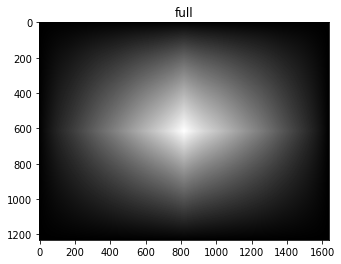

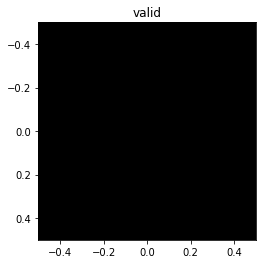

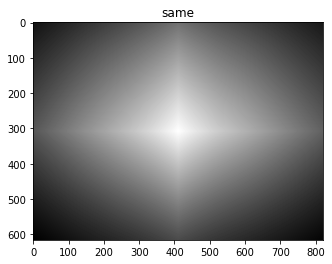

In [12]:
i_s_full=signal.fftconvolve(i0, h,mode='full') #We filter it with h(t)
i_s_valid=signal.fftconvolve(i0, h,mode='valid') #We filter it with h(t)
i_s_same=signal.fftconvolve(i0, h,mode='same') #We filter it with h(t)

# Plotting
plt.imshow(i_s_full, cmap='gray')
plt.title('full')
plt.show()

plt.imshow(i_s_valid, cmap='gray')
plt.title('valid')
plt.show()

plt.imshow(i_s_same, cmap='gray')
plt.title('same')
plt.show()

Then, we compute the convolution i0*PSF' (inverted)

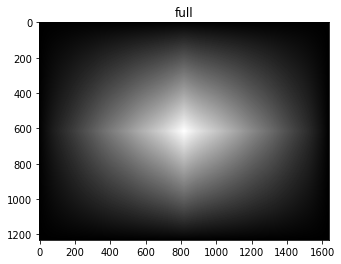

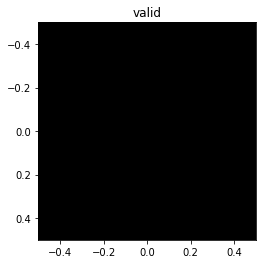

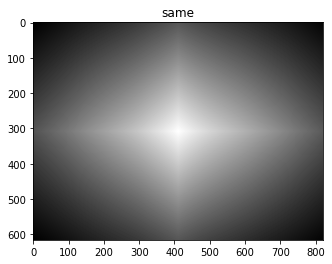

In [13]:
i_s_full2=signal.fftconvolve(i0, hf,mode='full') #We filter it with h(t)
i_s_valid2=signal.fftconvolve(i0, hf,mode='valid') #We filter it with h(t)
i_s_same2=signal.fftconvolve(i0, hf,mode='same') #We filter it with h(t)

# Plotting
plt.imshow(i_s_full2, cmap='gray')
plt.title('full')
plt.show()

plt.imshow(i_s_valid2, cmap='gray')
plt.title('valid')
plt.show()

plt.imshow(i_s_same2, cmap='gray')
plt.title('same')
plt.show()

We get the visually similar results with i0∗PSF as with i0∗PSF'.

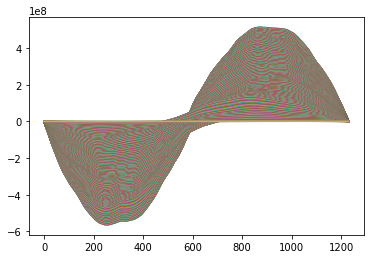

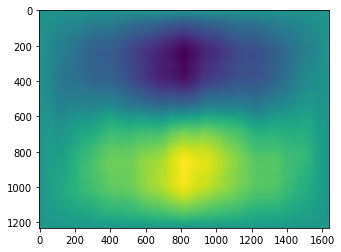

In [15]:
error=i_s_full2-i_s_full
plt.plot(error)
plt.show()
plt.imshow(error)
plt.show()